# Classification Comparison Project  
By: Avinash Bisram

This project aims to juxtapose the intuition and implementation of various supervised classification ML models and find the most accurate one in relation to the goal of classifying labeled data.

It contains the following sections...  
1. Data Selection
2. Initial Data Exploration
3. Data Cleaning
4. Exploratory Data Analysis
5. Machine Learning Intuition
6. Preprocessing
7. Model Creation and Training
8. Model Evaluation
9. Best Model Selection and Dataset Insights
10. Model Generalization
11. Model Productionization
12. Next Steps

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk

## Data Selection

The data that will be used in this project is the "Mushroom Classification" dataset by UCI Machine Learning. It was downloaded from Kaggle [here](https://www.kaggle.com/datasets/uciml/mushroom-classification), and can be found in this project's repository as "mushrooms.csv".  
It contains information about mushrooms as well as labels for each record indicating if the mushroom is edible or poisonous.

Attribute Information:
- (TARGET) classes: edible=e, poisonous=p
- cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
- cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
- cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
- bruises: bruises=t,no=f
- odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
- gill-attachment: attached=a,descending=d,free=f,notched=n
- gill-spacing: close=c,crowded=w,distant=d
- gill-size: broad=b,narrow=n
- gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
- stalk-shape: enlarging=e,tapering=t
- stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
- stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
- stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
- stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
- stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
- veil-type: partial=p,universal=u
- veil-color: brown=n,orange=o,white=w,yellow=y
- ring-number: none=n,one=o,two=t
- ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
- spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
- population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
- habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [3]:
# Storing the dataset in a DataFrame

rawData = pd.read_csv('mushrooms.csv')

## Initial Data Exploration

In [4]:
# Viewing the head of the DataFrame to get a general idea of how it looks

rawData.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
# Dataset Shape

rawData.shape

# 8124 Observations (rows), 23 Features (columns)

(8124, 23)

In [6]:
# Column Names

rawData.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [7]:
# Column Datatypes

rawData.dtypes

# All feature data types seem to be in line with what we expect based on the Attribute Information above.

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [8]:
# Descriptive Statistics

# Since all of our features are categorical and non-numeric, it is not appropriate to view descriptive statistics
# right now.

# rawData.describe()

In [9]:
# Identifying Missing data

rawData.isnull().sum().sort_values()

# It looks like none of our features contain missing data.

class                       0
spore-print-color           0
ring-type                   0
ring-number                 0
veil-color                  0
veil-type                   0
stalk-color-below-ring      0
stalk-color-above-ring      0
stalk-surface-below-ring    0
stalk-surface-above-ring    0
population                  0
stalk-root                  0
gill-color                  0
gill-size                   0
gill-spacing                0
gill-attachment             0
odor                        0
bruises                     0
cap-color                   0
cap-surface                 0
cap-shape                   0
stalk-shape                 0
habitat                     0
dtype: int64

In [10]:
# Identifying Duplicate Records

rawData.duplicated().sum()

# It appears that we do not have any duplicate records in this dataset either.

0

In [11]:
# A nice method call that displays column names, indirect null counts, and feature data types

rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

## Data Cleaning

In [12]:
# We saw above that our dataset has...
    # No missing values
    # No duplicate records
    # Appropriate feature datatypes

# The last consideration we need to make is whether any features contain typos (multiple strings being used to refer to the
# same category). We will check each feature for this now.

In [13]:
print("Feature\t| Unique Values\n")
for column in rawData.columns:
    print(f"{column}\t{sorted(rawData[column].unique())}")
    
# There does not appear to be any typos when comparing this list of values with the Attribute Information of the source.

Feature	| Unique Values

class	['e', 'p']
cap-shape	['b', 'c', 'f', 'k', 's', 'x']
cap-surface	['f', 'g', 's', 'y']
cap-color	['b', 'c', 'e', 'g', 'n', 'p', 'r', 'u', 'w', 'y']
bruises	['f', 't']
odor	['a', 'c', 'f', 'l', 'm', 'n', 'p', 's', 'y']
gill-attachment	['a', 'f']
gill-spacing	['c', 'w']
gill-size	['b', 'n']
gill-color	['b', 'e', 'g', 'h', 'k', 'n', 'o', 'p', 'r', 'u', 'w', 'y']
stalk-shape	['e', 't']
stalk-root	['?', 'b', 'c', 'e', 'r']
stalk-surface-above-ring	['f', 'k', 's', 'y']
stalk-surface-below-ring	['f', 'k', 's', 'y']
stalk-color-above-ring	['b', 'c', 'e', 'g', 'n', 'o', 'p', 'w', 'y']
stalk-color-below-ring	['b', 'c', 'e', 'g', 'n', 'o', 'p', 'w', 'y']
veil-type	['p']
veil-color	['n', 'o', 'w', 'y']
ring-number	['n', 'o', 't']
ring-type	['e', 'f', 'l', 'n', 'p']
spore-print-color	['b', 'h', 'k', 'n', 'o', 'r', 'u', 'w', 'y']
population	['a', 'c', 'n', 's', 'v', 'y']
habitat	['d', 'g', 'l', 'm', 'p', 'u', 'w']


## Exploratory Data Analysis

As this data is completely categorical and non-numeric, in our EDA process we are going to visualize the distribution of each class within our dataset as a whole and in relation to our target feature ('class').  

Our goals in this process are:
1. understand the distribution and balance of values within each feature
2. gain insight on the distribution of our target variable within each feature

Generally speaking, we want to avoid imbalance in the total counts of values within each feature (this is very important for our target feature but is also beneficial for independent features to generalize well with unseen data). However, it can be beneficial to have an imbalance in our class feature within each value of our independent features. This means some values in each feature have high amounts of one class over others. This occurence might point us to indicative attributes of our records (in this case attributes of mushrooms) that can help correctly differentiate their 'class' (whether they are poisonous or not).

Miscellaneous goals within this EDA process also include:
1. identifying potential outliers
2. feature selection or need for additional data cleaning

### EDA Helper Functions

In [14]:
'''Given a feature, visualize the counts of each value within and the breakdown of "class" for each value'''

def visualizeCounts(columnName):
    plt.figure(figsize=(12,6))

    plt.subplot(1,2,1)
    sns.countplot(x=rawData[columnName])
    plt.title(f"Count Plot of '{columnName}'")
    
    plt.subplot(1,2,2)
    sns.countplot(data=rawData, x=columnName, hue='class')
    plt.title(f"Distribution of 'Class' within '{columnName}'")
    plt.legend(title='class', loc=('upper left'), bbox_to_anchor=(1,1))

    plt.show()

In [15]:
'''Display the percentages of each unique value within a given feature'''

def valuePercentages(columnName):
    print(f"{columnName} | Percentage")
    print( round(rawData[columnName].value_counts() / rawData.shape[0] * 100, 2))

In [16]:
'''Display the percentages of "class" within a given feature'''

def classPercentages(columnName):
    
    def calculatePercentage(row):
        return round(row[0] / valueCounts[row[columnName]] * 100,2)
    
    valueCounts = rawData[columnName].value_counts()
    
    tempPercentages = rawData[[columnName,'class']].groupby([columnName,'class']).agg(len).reset_index().copy(deep=True)
    tempPercentages[0] = tempPercentages.apply(calculatePercentage, axis=1)
    tempPercentages.set_index(columnName, inplace=True)
    tempPercentages.rename({0:'%'},axis=1, inplace=True)
    
    print(tempPercentages)

### 'Class' (our Target)

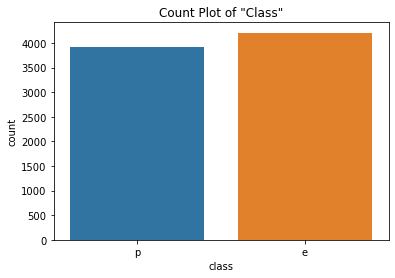

In [17]:
# 'Class' (our Target Feature)

sns.countplot(x=rawData['class'])
plt.title('Count Plot of "Class"')
plt.show()

# We can see that both distinct values in the 'class' feature have roughly the same count.
# This is good because if our target feature was unbalanced and had a large majority of one value over another,
# our Classification models could just identify most/all records as that majority value giving us a high accuracy
# but largely misclassifying records of the other category.

# Example, if our dataset had 99% dogs and 1% cats, our model could label everything as a dog and achieve 99% accuracy.
# However, it would be terrible at correctly identifying cats!

In [18]:
# Let's express the counts from above as percentages

print('Class | Percentage')
round(rawData['class'].value_counts() / rawData.shape[0] *100,2)

# There are slightly more edible mushrooms in our dataset than poisonous but these values can still be considered "balanced"
# since the minority class ('p') has a percentage > 40%.

Class | Percentage


e    51.8
p    48.2
Name: class, dtype: float64

### Cap Shape

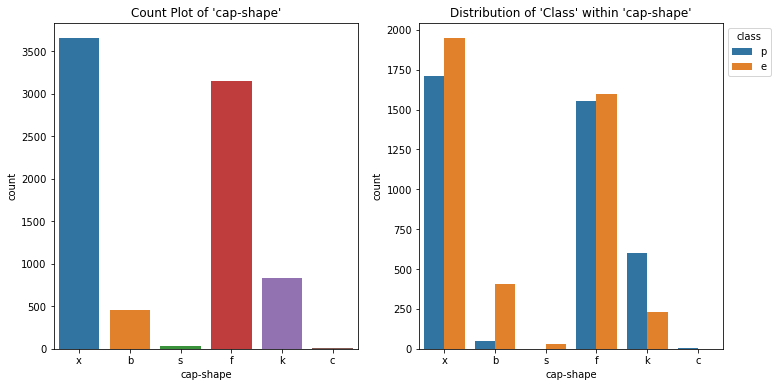

In [19]:
# 'Cap Shape'

visualizeCounts('cap-shape')

# LEFT FIGURE:
# This feature appears quite unbalanced with very large counts for cap shapes of 'x' and 'f' with very few for cap shapes
# of 's' and 'c'.

# RIGHT FIGURE:
# Here, we are looking for large differences in counts WITHIN each distinct cap shape. We can see a relatively significant
# difference in counts for poisonous and edible mushrooms when cap shapes are 'b' (possible 'x' and 'k' as well).
# It is hard to visually discern significant differences in cap shapes of 's' and 'c' due to their small total counts.

In [20]:
# Let's take a quick look at the value counts for Cap Shape

valuePercentages('cap-shape')

# It looks like the minority features of sunken and conical cap shapes make up less than 1% of our data.
# Therefore, this feature has EXTREME imbalance.

cap-shape | Percentage
x    45.00
f    38.80
k    10.19
b     5.56
s     0.39
c     0.05
Name: cap-shape, dtype: float64


In [21]:
# Let's also look at the concentration of 'class' within each cap-shape

classPercentages('cap-shape')

# BALANCED (minority % > 40): 'f', 'x'
# MILD IMBALANCE (minority % between 20 and 40): 'k'
# MODERATE IMBALANCE (minority % between 1 and 20): 'b', 
# EXTREME IMBALANCE (minority % < 1): 'c', 's'

# Both of our majority values identified above, 'x' and 'f' are balanced.
# Cap shapes of 'k' and 'b' are mildly to moderately imbalanced so they might be useful in identifying poison mushrooms.
# Suprisingly, the two minority values in 's' and 'c' have 100% class concentration. All mushrooms with 'c' cap shapes
    # are POISONOUS while all mushrooms with 's' cap shapes are EDIBLE. However, we saw above that the total counts
    # for both values are extremely small, we can't say for certain that this isn't a result of a small sample size.

          class       %
cap-shape              
b             e   89.38
b             p   10.62
c             p  100.00
f             e   50.63
f             p   49.37
k             e   27.54
k             p   72.46
s             e  100.00
x             e   53.28
x             p   46.72


### Cap Surface

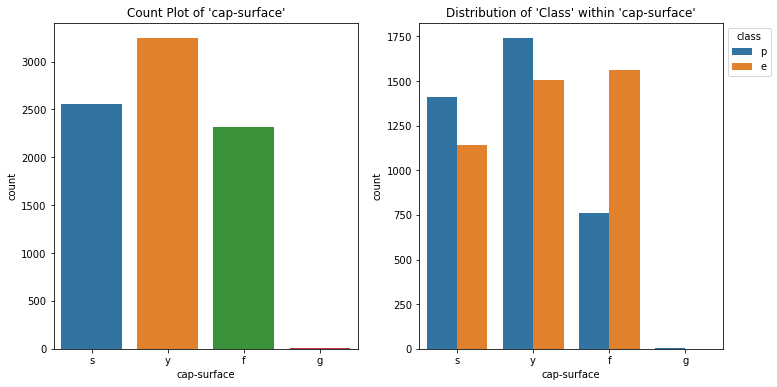

In [22]:
# 'Cap Surface'

visualizeCounts('cap-surface')

# LEFT FIGURE:
# It appears most of the values are relatively balanced (or slightly imbalanced) with the
# exception of cap surface 'g' which is a very significant minority.

# RIGHT FIGURE:
# Cap surfaces of 's' and 'y' seem to be relatively balanced in relation to class breakdown
# but 'f' looks to be more imbalanced. It is hard to identify an insight for 'g' with this
# visualization.

In [23]:
# Comparing the value counts (in relative percentage) for Cap Surface

valuePercentages('cap-surface')

# As we thought, the top three frequent values are relatively balanced (within ~10% count)
# but 'g' is a significant minority. In the current state this feature illustrates EXTREME
# imbalance (the minority category has < 1% total percentage).

cap-surface | Percentage
y    39.93
s    31.46
f    28.56
g     0.05
Name: cap-surface, dtype: float64


In [25]:
# Percentage of 'class' in each cap-surface

classPercentages('cap-surface')

# BALANCED: 's', 'y'
# MILD IMBALANCE: 'f'
# MODERATE IMBALANCE: N/A
# EXTREME IMBALANCE: 'g'

# Similar to the trend of the previous feature, the values with the highest counts are relatively
# balanced. The 'g' cap surface has 100% concentration of poisonous mushrooms however, as we 
# saw above, it makes up so little of our dataset that it could be an issue of sample size.

# To note, the cap surface of 'f' has a decent count and is mildly imbalanced relating to 'class'
# so this might be a beneficial indicator for predicting a mushroom as being poisonous or not.

            class       %
cap-surface              
f               e   67.24
f               p   32.76
g               p  100.00
s               e   44.76
s               p   55.24
y               e   46.36
y               p   53.64


### Cap Color

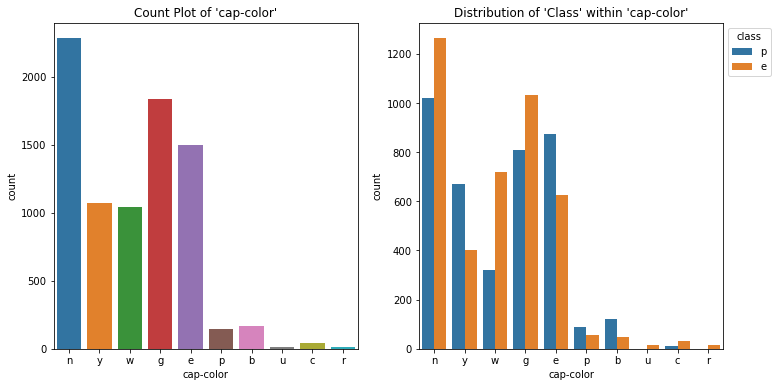

In [26]:
# 'Cap Color'

visualizeCounts('cap-color')

# LEFT FIGURE:
# We can see clear imbalance. 5 distinct values have medium to high counts while the other 5
# have significantly lower counts.

# RIGHT FIGURE:
# We can't clearly quantify the class balance of most features from this visualization however,
# it appears that 'y' and 'w' has slightly more imbalance than the other values.

In [27]:
# Quantifying the total counts of values within Cap Color

valuePercentages('cap-color')

# As the minority values of 'u' and 'r' have total count percentages <1%, this feature has
# EXTREME imbalance.

# The 5 least frequent values make up < 5% of our total dataset.

cap-color | Percentage
n    28.11
g    22.65
e    18.46
y    13.20
w    12.80
b     2.07
p     1.77
c     0.54
u     0.20
r     0.20
Name: cap-color, dtype: float64


In [28]:
# Breakdown of 'class' within Cap Color

classPercentages('cap-color')

# BALANCED: 'e', 'g', 'n'
# MILD IMBALANCE: 'b', 'c', 'p', 'w', 'y'
# MODERATE IMBALANCE: N/A
# EXTREME IMBALANCE: 'r', 'u'

# In our relatively frequent values from above, the values of 'w' and 'y' are also imbalanced
# so they might be useful for determining the 'class' of a mushroom.
# As expected from the previous trend, the values with extreme imbalance are very small minorities
# in terms of overall counts and have 100% class concentration so it is possibly an issue of
# sample size.

          class       %
cap-color              
b             e   28.57
b             p   71.43
c             e   72.73
c             p   27.27
e             e   41.60
e             p   58.40
g             e   56.09
g             p   43.91
n             e   55.34
n             p   44.66
p             e   38.89
p             p   61.11
r             e  100.00
u             e  100.00
w             e   69.23
w             p   30.77
y             e   37.31
y             p   62.69


### Bruises

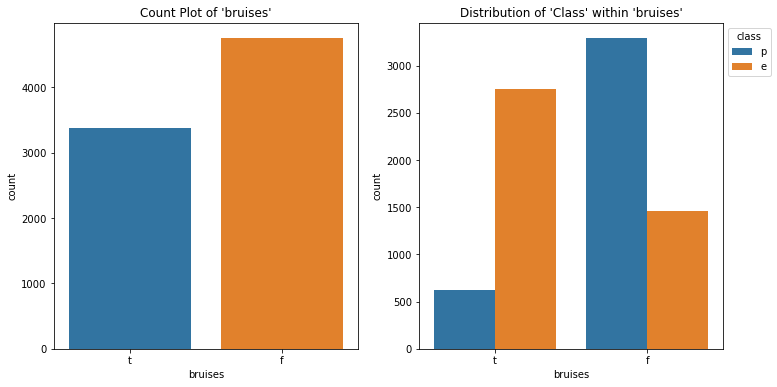

In [29]:
# 'Bruises'

visualizeCounts('bruises')

# LEFT FIGURE:
# The two values in this feature seem to be relatively balanced (or perhaps barely imbalanced).

# RIGHT FIGURE:
# Surprisingly, both distinct values in this feature seem to have imbalance in relation to 'class'
# concentration. We'll quantify this shortly but this could turn out to be a useful find.

In [30]:
# Quantifying count percentage per value in Bruises

valuePercentages('bruises')

# Since the minority category of 't' has a percenage >40%, this feature can be considered BALANCED.

bruises | Percentage
f    58.44
t    41.56
Name: bruises, dtype: float64


In [31]:
# Breakdown of 'class' within each value of Bruises

classPercentages('bruises')

# BALANCED: N/A
# MILD IMBALANCE: 'f'
# MODERATE IMBALANCE: 't'
# EXTREME IMBALANCE: N/A

# 

        class      %
bruises             
f           e  30.67
f           p  69.33
t           e  81.52
t           p  18.48


### Odor

In [ ]:
# 'Odor'

visualizeCounts('odor')

# 

In [ ]:
valuePercentages('odor')

### Gill Attachment

In [ ]:
# 'Gill Attachment'

visualizeCounts('gill-attachment')

# 

In [ ]:
valuePercentages('gill-attachment')

### Gill Spacing

In [ ]:
# 'Gill Spacing'

visualizeCounts('gill-spacing')

In [ ]:
valuePercentages('gill-spacing')

### Gill Size

In [ ]:
# 'Gill Size'

visualizeCounts('gill-size')

In [ ]:
valuePercentages('gill-size')

### Gill Color

In [ ]:
# 'Gill Color'

visualizeCounts('gill-color')

In [ ]:
valuePercentages('gill-color')

### Stalk Shape

In [ ]:
# 'Stalk Shape'

visualizeCounts('stalk-shape')

In [ ]:
valuePercentages('stalk-shape')

### Stalk Root

In [ ]:
# 'Stalk Root'

visualizeCounts('stalk-root')

In [ ]:
valuePercentages('stalk-root')

### Stalk Surface Above Ring

In [ ]:
# 'Stalk Surface Above Ring'

visualizeCounts('stalk-surface-above-ring')

In [ ]:
valuePercentages('stalk-surface-above-ring')

### Stalk Surface Below Ring

In [ ]:
# 'Stalk Surface Below Ring'

visualizeCounts('stalk-surface-below-ring')

In [ ]:
valuePercentages('stalk-surface-below-ring')

### Stalk Color Above Ring

In [ ]:
# 'Stalk Color Above Ring'

visualizeCounts('stalk-color-above-ring')

In [ ]:
valuePercentages('stalk-color-above-ring')

### Stalk Color Below Ring

In [ ]:
# 'Stalk Color Below Ring'

visualizeCounts('stalk-color-below-ring')

In [ ]:
valuePercentages('stalk-color-below-ring')

### Veil Type

In [ ]:
# 'Veil Type'

visualizeCounts('veil-type')

In [ ]:
valuePercentages('veil-type')

### Veil Color

In [ ]:
# 'Veil Color'

visualizeCounts('veil-color')

In [ ]:
valuePercentages('veil-color')

### Ring Number

In [ ]:
# 'Ring Number'

visualizeCounts('ring-number')

In [ ]:
valuePercentages('ring-number')

### Ring Type

In [ ]:
# 'Ring Type'

visualizeCounts('ring-type')

In [ ]:
valuePercentages('ring-type')

### Spore Print Color

In [ ]:
# 'Spore Print Color'

visualizeCounts('spore-print-color')

In [ ]:
valuePercentages('spore-print-color')

### Population

In [ ]:
# 'Population'

visualizeCounts('population')

In [ ]:
valuePercentages('population')

### Habitat

In [ ]:
# 'Habitat'

visualizeCounts('habitat')

In [ ]:
valuePercentages('habitat')

### Each Feature vs. Target Feature

In [ ]:
for column in rawData.columns[1:]:
    sns.countplot(data=rawData, x=column, hue='class')
    plt.title(f"Distribution of 'Class' per '{column}''")
    plt.show()

In [ ]:
sns.countplot(data=rawData, x='cap-shape', hue='class')
plt.title('Count Plot of "Cap Shape"')
plt.show()

### Feature Correlation

## Machine Learning Intuition

Now that we have verified that the dataset is "clean" (no missing values, no duplicates, no typos, etc.), and have explored the distributions and relationships between them, it is time to think about how we should solve our problem of correctly predicting whether new mushrooms with certain attributes are poisonous or edible.  

Since we are trying to predict which distinct category a new mushroom belongs to (being edible or poisonous), this is a Classification task.  

Furthermore, since the attribute we are trying to predict has TWO categories, this is a Binary Classification task (compared to a multiclass problem).

Lastly, since all of our observations have an existing category assigned to them, they are all 'labeled', meaning we are dealing with a Supervised machine learning task. Therefore, we can summarize our task as being Supervised Binary Classification.

Now that we know the task we are trying to solve, we can think about which machine learning models we want to use. There are many popular Supervised Classification ML models that have various benefits and drawbacks. This project will give us an opportunity to compare a few of them and see which one performs the best with our data.

The machine learning models we will be comparing in this project are:
- Logistic Regression
- K Nearest Neighbors Classifer
- Support Vector Machine Classifier
- Naive Bayes Classifer
- Single Decision Tree  

and a few Ensemble methods that build on Decision Trees including:
- Random Forest Classifer
- AdaBoost Classifer
- Gradient Boost Classifer

**Note:** We will save Neural Networks for a separate project!

## Preprocessing

## Model Creation and Training

## Model Evaluation

## Best Model Selection and Dataset Insights

## Model Generalization

## Model Productionization

## Next Steps